### 1. Import Lib & Dataset

In [133]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# TensorFlow / Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical

cervic = pd.read_csv('cervical_cancer_risk_classification.csv')

### 2. Pre-processing

In [134]:
cervic = pd.read_csv('cervical_cancer_risk_classification.csv')

cervic.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
cervic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [136]:
cervic.tail(30)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
828,33,2.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
829,34,3.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
830,35,4.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
831,40,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,0,0,0,0,0,0,0,0
832,30,2.0,18.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,?,?,0,0,0,0,0,0,0,0
833,34,1.0,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
834,30,3.0,15.0,0.0,1.0,16.0,8.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
835,24,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
836,37,3.0,?,0.0,0.0,0.0,0.0,1.0,0.25,0.0,...,?,?,0,0,0,0,0,0,0,0
837,31,9.0,?,1.0,1.0,11.0,5.5,1.0,0.25,0.0,...,?,?,0,0,0,0,0,0,0,0


Per the previous line of code some "?" were identified and where I ran the **`cervic.info()`** I saw multiple columns as object so despite of being non-null it could still contain bad data, so let's explore further.

In [137]:
# Check for "?" in each column
question_marks = cervic.isin(["?"]).sum()
print(question_marks[question_marks > 0])

Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                          

My hypothesis was correct, now I have the total count of bad data (rows containing "?") So let's clean this dataset.

In [138]:
# Let's replace '?' with NaN
cervic = cervic.replace('?', np.nan)
cervic

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [139]:
cervic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

Now we can clearly identify that 2 columns have plenty of bad data or missing values. Now it's time to clean it.

In [140]:
cervic = cervic.drop(columns = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])
cervic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

According to the updated `cervic.info()` results it seems we no longer have those columns, now let's convert columns with datatype object to numeric

In [141]:
cervic = cervic.apply(pd.to_numeric, errors='coerce')
cervic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [142]:
cervic.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
cervic.head(100)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31,4.0,16.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
96,35,5.0,11.0,NaN,1.0,15.0,15.0,1.0,14.0,0.0,...,0.0,0,0,0,0,0,1,1,1,1
97,35,1.0,18.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
98,31,1.0,20.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0


It seems that there are still some NaN values, let's get the final count for all the columns

In [144]:
nan_counts = cervic.isna().sum()
print(nan_counts)


Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

**Inputing missing data using the average value. Why?**

*   Deleting rows with missing values would result in significant data loss, reducing the already limited amount of information available for training the model.
*   For example, the dataset only has 858 rows, and dropping rows with missing values could drastically affect the representation of the data.
*   The authors of the paper "Supervised deep learning embeddings for the prediction of cervical cancer diagnosis" used mean imputation to handle missing data, stating, "We scaled all the features in our experiments using [0,1] normalization, and we input missing data using the average value" (Fernandes et al.)
> Fernandes, Kelwin, et al. "Supervised deep learning embeddings for the prediction of cervical cancer diagnosis." PeerJ Computer Science, vol. 4, 2018, p. e154. https://doi.org/10.7717/peerj-cs.154.


















In [145]:
# Replace null values with mean
cervic = cervic.fillna(cervic.mean())
cervic

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [146]:
cervic.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,...,0.048244,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's double check that all the NaN are gone:

In [147]:
nan_counts = cervic.isna().sum()
print(nan_counts)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


### 3. Data Visualization

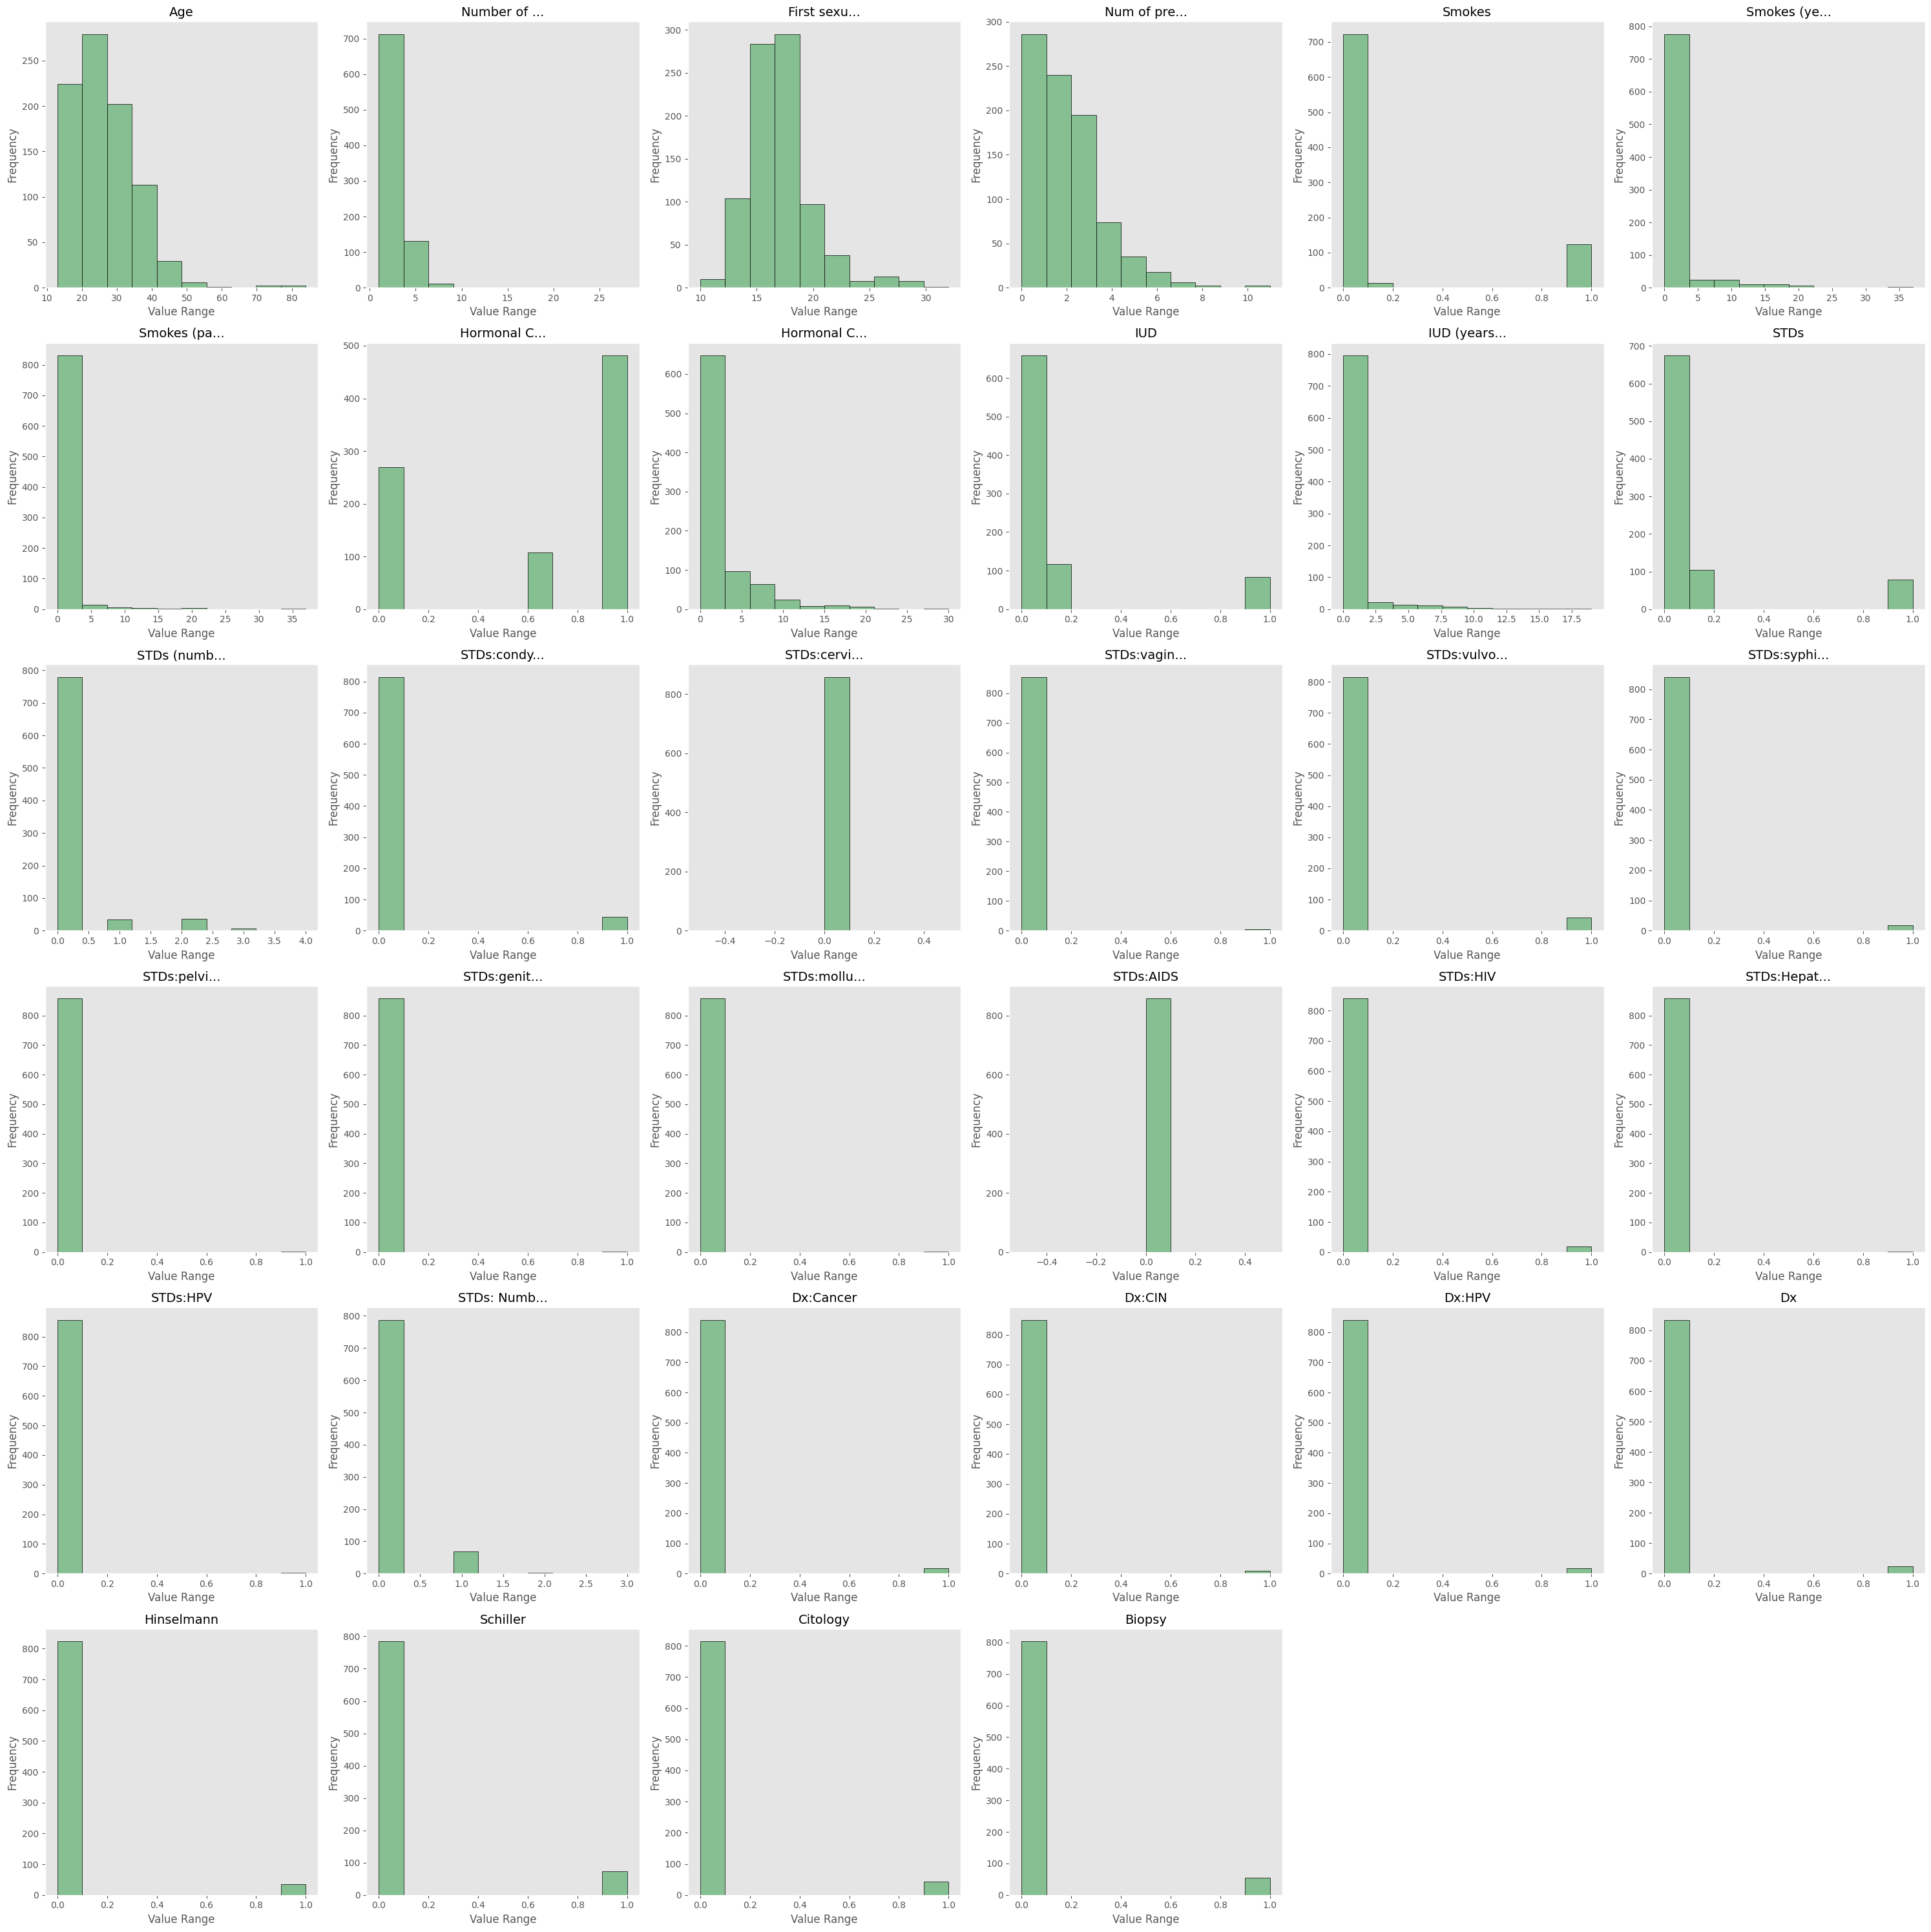

In [148]:
# Define a function to shorten titles
def shorten_title(title, max_len=10):
    return title if len(title) <= max_len else title[:max_len] + "..."

# Set a consistent style for better visuals
plt.style.use("ggplot")

# Create histograms
ax = cervic.hist(bins=10, figsize=(30, 30), color="#86bf91", edgecolor="black", grid=False)

# Enhance each subplot
for row in ax:
    for subplot in row:
        # Shorten long titles
        subplot.set_title(shorten_title(subplot.get_title()), fontsize=14)
        # Add better x and y labels
        subplot.set_xlabel("Value Range", fontsize=12)
        subplot.set_ylabel("Frequency", fontsize=12)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


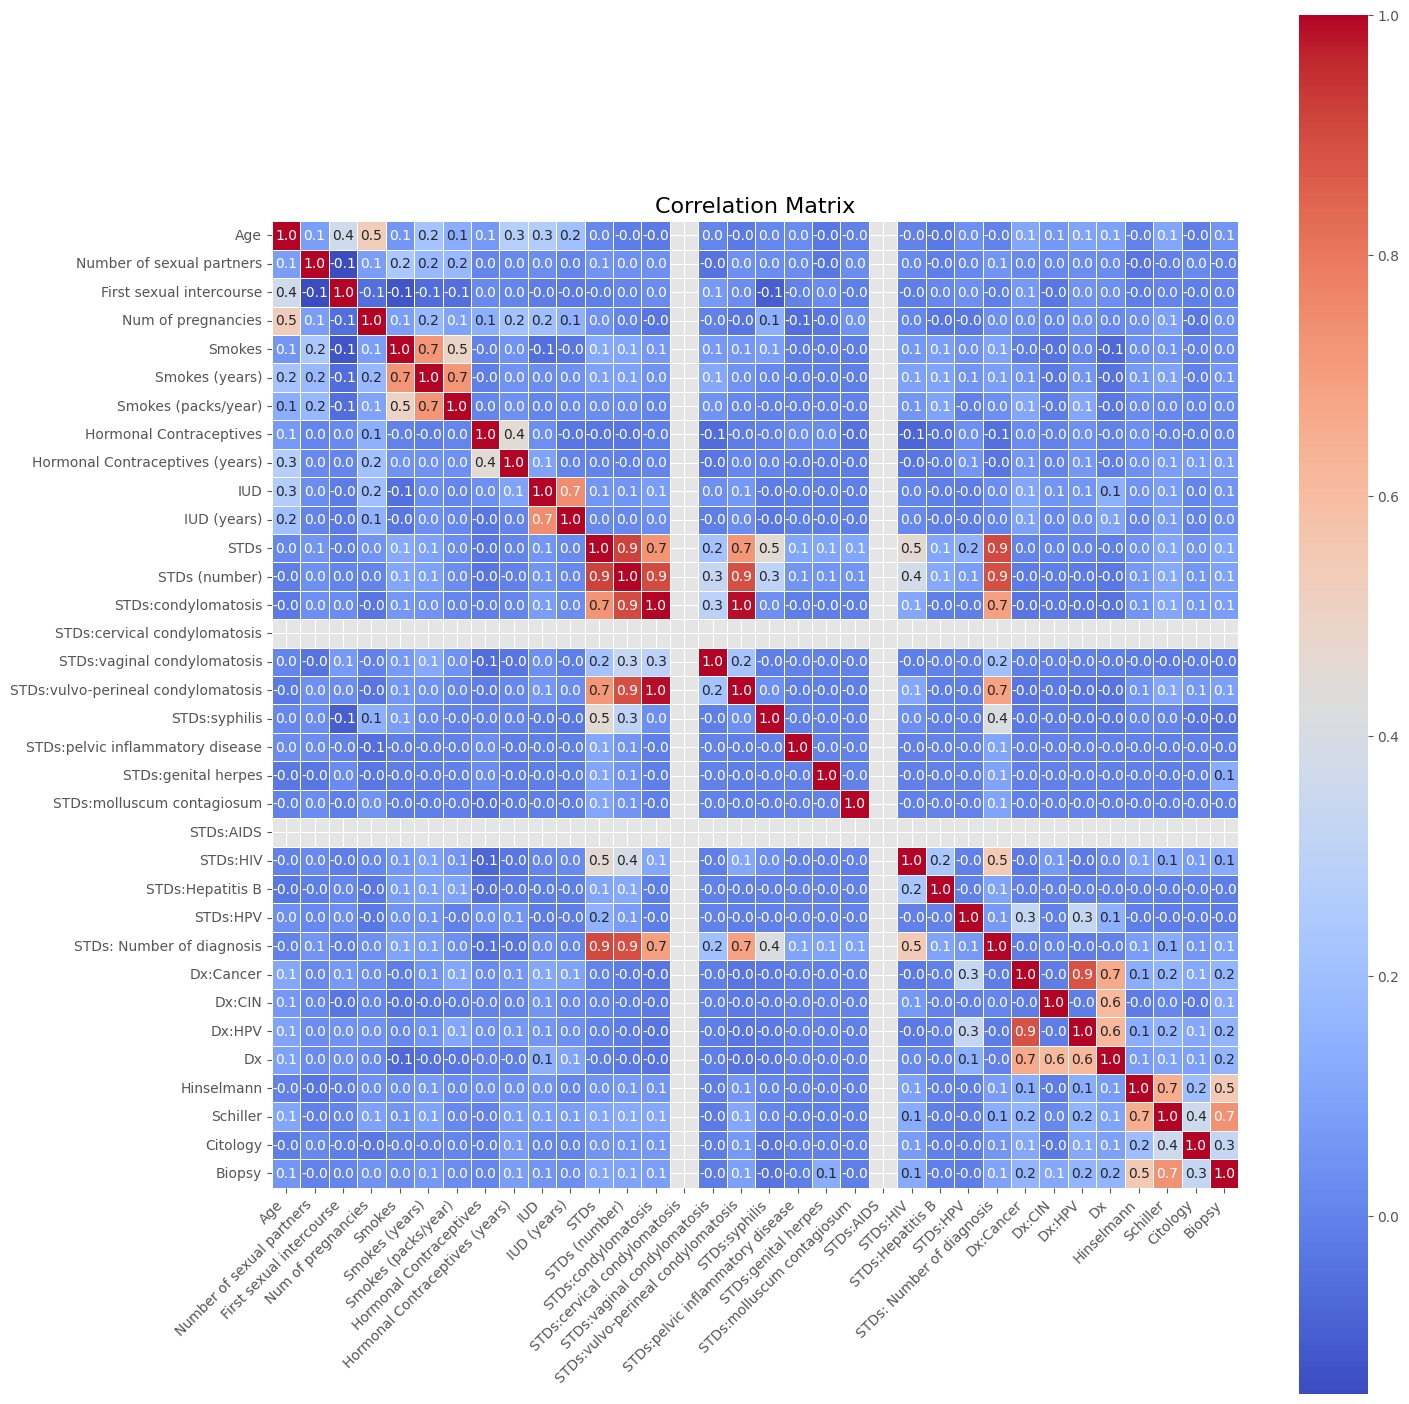

In [149]:
# Compute the correlation matrix
corr_matrix = cervic.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Use a diverging colormap for better distinction between positive and negative correlations
sns.heatmap(
    corr_matrix,
    annot=True,  # Annotate cells with correlation coefficients
    fmt=".1f",   # Format to show numbers with 1 decimal place
    cmap="coolwarm",  # Color map for visualization
    cbar=True,   # Show the color bar
    square=True, # Ensure squares for clarity
    linewidths=0.5,  # Add gridlines
    annot_kws={"size": 10}  # Adjust annotation font size
)

# Add titles and labels for clarity
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()



*   This correlation matrix allow us to understand if there is high, low or no corerlation between features

*   There are some highly correlated cases like **Smokes** and **Smokes (years)** (Correlation: **0.7**)

*   Also there is a high correlation between **STD numbers** and **STDs:condylomatosis** (**0.9**)
*   I'm deciding not to drop  any features now to ensure the models could learn patterns from the complete dataset, but I might have the time to implement deep supervised encoders to fight dimensionality and correlation.





**Understanding the target variable.**

The final four columns (“Hinselmann,” “Schiller,” “Citology,” and “Biopsy”) represent the outcomes of various cervical cancer screening tests. A positive result in any of these tests does not necessarily confirm a diagnosis of cervical cancer. However, the likelihood of cervical cancer increases as more tests return positive results.
To capture this cumulative risk, I introduced a new variable, CervicalCancer, calculated as the sum of the four test results:


> **CervicalCancer**=Hinselmann+Schiller+Citology+Biopsy




CervicalCancer
0    0.88
1    0.05
2    0.03
3    0.04
4    0.01
Name: proportion, dtype: float64


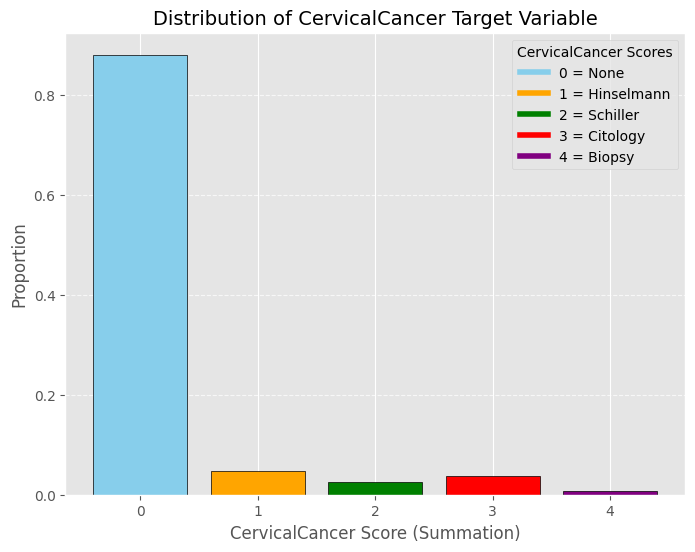

In [150]:
# Create the 'CervicalCancer' column by summing the relevant columns
cervic['CervicalCancer'] = cervic[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].sum(axis=1)

# Calculate the proportion of each value in 'CervicalCancer'
cervical_cancer_dist = cervic['CervicalCancer'].value_counts(normalize=True).sort_index()
print(cervical_cancer_dist.round(2))
colors = {
    0: 'skyblue',
    1: 'orange',
    2: 'green',
    3: 'red',
    4: 'purple'
}
plt.figure(figsize=(8, 6))
bars = plt.bar(
    cervical_cancer_dist.index,
    cervical_cancer_dist.values,
    color=[colors[int(score)] for score in cervical_cancer_dist.index],
    edgecolor='black'
)
plt.title('Distribution of CervicalCancer Target Variable', fontsize=14)
plt.xlabel('CervicalCancer Score (Summation)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(ticks=cervical_cancer_dist.index, labels=cervical_cancer_dist.index.astype(int), rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
legend_labels = [
    plt.Line2D([0], [0], color=color, lw=4, label=f'{score} = {"None" if score == 0 else ["Hinselmann", "Schiller", "Citology", "Biopsy"][score - 1]}')
    for score, color in colors.items()
]
plt.legend(handles=legend_labels, loc='upper right', title='CervicalCancer Scores', fontsize=10)
plt.show()


### 4.Pre-Modeling


#### **4.1 Split the dataset into features (X) and target label (y)**

In [151]:
# Define features and target
X = cervic.drop(columns=['Biopsy'])  # Exclude target column
y = cervic['Biopsy']  # Target variable

# Perform train-test split with 10% test size and stratification
features_train_all, features_test_all, labels_train_all, labels_test_all = train_test_split(
    features, labels, test_size=0.1, random_state=21, stratify=labels
)

# Reset indices for the training and testing sets
for dataset in [features_train_all, features_test_all, labels_train_all, labels_test_all]:
    dataset.reset_index(drop=True, inplace=True)

# Check shapes of the resulting datasets
print("Training Features Shape:", features_train_all.shape)
print("Testing Features Shape:", features_test_all.shape)
print("Training Labels Shape:", labels_train_all.shape)
print("Testing Labels Shape:", labels_test_all.shape)

Training Features Shape: (772, 34)
Testing Features Shape: (86, 34)
Training Labels Shape: (772,)
Testing Labels Shape: (86,)


#### **4.2 Normalize data**

In [152]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test datasets
features_train_all_std = scaler.fit_transform(features_train_all)
features_test_all_std = scaler.transform(features_test_all)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert back to DataFrame for compatibility if needed
features_train_all_std = pd.DataFrame(features_train_all_std, columns=features_train_all.columns)
features_test_all_std = pd.DataFrame(features_test_all_std, columns=features_test_all.columns)

features_train_all_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,CervicalCancer
0,0.140412,0.290761,0.351258,-0.188418,-0.411914,-0.295418,-0.200383,0.809014,1.091162,-0.384979,...,-0.057134,-0.289907,-0.150055,-0.088504,-0.154508,-0.163082,-0.201075,-0.310791,-0.233762,-0.331696
1,-0.451280,-0.313724,-0.706581,-0.188418,-0.411914,-0.295418,-0.200383,0.809014,-0.357231,2.980363,...,-0.057134,3.050519,-0.150055,-0.088504,-0.154508,-0.163082,-0.201075,-0.310791,-0.233762,-0.331696
2,-1.042973,-0.313724,-0.706581,-0.911643,-0.411914,-0.295418,-0.200383,-1.410203,-0.646910,-0.384979,...,-0.057134,-0.289907,-0.150055,-0.088504,-0.154508,-0.163082,-0.201075,-0.310791,-0.233762,-0.331696
3,0.377089,0.290761,0.703871,-0.188418,-0.411914,-0.295418,-0.200383,0.809014,1.960198,-0.384979,...,-0.057134,3.050519,-0.150055,-0.088504,-0.154508,-0.163082,-0.201075,-0.310791,-0.233762,-0.331696
4,-0.451280,-0.313724,-0.706581,-1.634869,-0.411914,-0.295418,-0.200383,-1.410203,-0.646910,-0.384979,...,-0.057134,-0.289907,-0.150055,-0.088504,-0.154508,-0.163082,-0.201075,-0.310791,-0.233762,-0.331696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.140412,-0.313724,0.703871,-0.188418,2.463258,0.021489,0.039123,-1.410203,-0.646910,-0.384979,...,-0.057134,3.050519,-0.150055,-0.088504,-0.154508,-0.163082,-0.201075,3.217599,-0.233762,2.407016
768,-0.451280,-0.313724,0.351258,0.534808,-0.411914,-0.295418,-0.200383,-1.410203,-0.646910,-0.384979,...,-0.057134,-0.289907,-0.150055,-0.088504,-0.154508,-0.163082,-0.201075,-0.310791,-0.233762,-0.331696
769,0.140412,-0.313724,-0.706581,0.010875,-0.411914,-0.295418,-0.200383,-1.410203,-0.646910,-0.384979,...,-0.057134,-0.289907,-0.150055,-0.088504,-0.154508,-0.163082,-0.201075,-0.310791,-0.233762,-0.331696
770,1.678812,0.895246,1.409096,0.534808,-0.411914,-0.295418,-0.200383,0.809014,-0.574490,-0.384979,...,-0.057134,-0.289907,-0.150055,-0.088504,-0.154508,-0.163082,-0.201075,-0.310791,-0.233762,-0.331696


### Selecting Classification Models



*   Random Forest
*   KNN
*   Conv1D




#### **4.2 Randon Forest Parameter Tuning**

In [153]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for Random Forest: 0.9796255157092986


#### **4.3 KNN Parameter Tuning**

In [154]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier()

# Perform GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Score for KNN:", grid_search_knn.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score for KNN: 0.9475193060404103


#### **4.4 Conv1D Parameter Tuning**

In [155]:
# Normalize and reshape the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Function to create Conv1D model
def create_conv1d_model(filters, kernel_size, pool_size, dense_units, input_shape):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Parameter tuning (manual grid search)
filter_sizes = [32, 64]
kernel_sizes = [3, 5]
pool_sizes = [2, 3]
dense_units = [50, 100]

best_model = None
best_accuracy = 0

for filters in filter_sizes:
    for kernel_size in kernel_sizes:
        for pool_size in pool_sizes:
            for dense_unit in dense_units:
                model = create_conv1d_model(filters, kernel_size, pool_size, dense_unit, input_shape=(X_train_reshaped.shape[1], 1))
                model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, verbose=0)
                loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
                print(f"Filters: {filters}, Kernel Size: {kernel_size}, Pool Size: {pool_size}, Dense Units: {dense_unit}, Accuracy: {accuracy:.4f}")
                if accuracy > best_accuracy:
                    best_model = model
                    best_accuracy = accuracy

print(f"Best Conv1D Model Accuracy: {best_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Filters: 32, Kernel Size: 3, Pool Size: 2, Dense Units: 50, Accuracy: 0.9535
Filters: 32, Kernel Size: 3, Pool Size: 2, Dense Units: 100, Accuracy: 0.9477
Filters: 32, Kernel Size: 3, Pool Size: 3, Dense Units: 50, Accuracy: 0.9535
Filters: 32, Kernel Size: 3, Pool Size: 3, Dense Units: 100, Accuracy: 0.9535
Filters: 32, Kernel Size: 5, Pool Size: 2, Dense Units: 50, Accuracy: 0.9535
Filters: 32, Kernel Size: 5, Pool Size: 2, Dense Units: 100, Accuracy: 0.9709
Filters: 32, Kernel Size: 5, Pool Size: 3, Dense Units: 50, Accuracy: 0.9477
Filters: 32, Kernel Size: 5, Pool Size: 3, Dense Units: 100, Accuracy: 0.9535
Filters: 64, Kernel Size: 3, Pool Size: 2, Dense Units: 50, Accuracy: 0.9477
Filters: 64, Kernel Size: 3, Pool Size: 2, Dense Units: 100, Accuracy: 0.9709
Filters: 64, Kernel Size: 3, Pool Size: 3, Dense Units: 50, Accuracy: 0.9535
Filters: 64, Kernel Size: 3, Pool Size: 3, Dense Units: 100, Accuracy: 0.9535
Filters: 64, Kernel Size: 5, Pool Size: 2, Dense Units: 50, Accuracy: 

### 10-Fold Cross Validation

In [156]:
# Ensure the metrics list in get_metrics matches the metric_columns definition
def calc_metrics(conf_matrix):

    TP, FN = conf_matrix[0][0], conf_matrix[0][1]
    FP, TN = conf_matrix[1][0], conf_matrix[1][1]
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate
    FPR = FP / (TN + FP) if (TN + FP) > 0 else 0  # False Positive Rate
    FNR = FN / (TP + FN) if (TP + FN) > 0 else 0  # False Negative Rate
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Precision
    F1_measure = 2 * TP / (2 * TP + FP + FN) if (2 * TP + FP + FN) > 0 else 0  # F1 Score
    Accuracy = (TP + TN) / (TP + FP + FN + TN)  # Accuracy
    Error_rate = (FP + FN) / (TP + FP + FN + TN)  # Error Rate
    BACC = (TPR + TNR) / 2  # Balanced Accuracy
    TSS = TPR - FPR  # True Skill Statistic
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN)) if ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN)) > 0 else 0  # Heidke Skill Score

    return [TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS]

def get_metrics(model, X_train, X_test, y_train, y_test, Conv1D_flag=False):

    metrics = []

    if Conv1D_flag:
        # Convert data to numpy array and reshape for Conv1D input
        X_train, X_test, y_train, y_test = map(np.array, [X_train, X_test, y_train, y_test])
        X_train_reshaped = X_train.reshape(len(X_train), X_train.shape[1], 1)
        X_test_reshaped = X_test.reshape(len(X_test), X_test.shape[1], 1)

        # Train the Conv1D model
        model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, verbose=0)

        # Predictions and metrics
        predict_prob = model.predict(X_test_reshaped)
        pred_labels = (predict_prob > 0.5).astype(int)
        conf_matrix = confusion_matrix(y_test, pred_labels, labels=[1, 0])

        conv1d_brier_score = brier_score_loss(y_test, predict_prob)
        conv1d_roc_auc = roc_auc_score(y_test, predict_prob)

        metrics.extend(calc_metrics(conf_matrix))
        metrics.extend([conv1d_brier_score, conv1d_roc_auc])

    else:
        # Train the Random Forest or KNN model
        model.fit(X_train, y_train)

        # Predictions and metrics
        predicted = model.predict(X_test)
        predict_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        conf_matrix = confusion_matrix(y_test, predicted, labels=[1, 0])

        model_brier_score = brier_score_loss(y_test, predict_prob) if predict_prob is not None else None
        model_roc_auc = roc_auc_score(y_test, predict_prob) if predict_prob is not None else None

        metrics.extend(calc_metrics(conf_matrix))
        metrics.extend([model_brier_score, model_roc_auc])

    return metrics

# Correct the metric_columns definition to match get_metrics output
metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'Precision',
                  'F1_measure', 'Accuracy', 'Error_rate', 'BACC', 'TSS', 'HSS',
                  'Brier_score', 'AUC']

# Initialize metrics lists for each algorithm
knn_metrics_list, rf_metrics_list, conv1d_metrics_list = [], [], []

# Best parameters (use your tuned hyperparameters)
best_n_neighbors = 5  # Example for KNN
best_rf_params = {'n_estimators': 100, 'min_samples_split': 2}  # Example for Random Forest

# Perform Stratified 10-Fold Cross-Validation
for iter_num, (train_index, test_index) in enumerate(cv_stratified.split(features_train_all_std, labels_train_all), start=1):
    # Split data into training and testing sets for this fold
    features_train, features_test = features_train_all_std.iloc[train_index, :], features_train_all_std.iloc[test_index, :]
    labels_train, labels_test = labels_train_all.iloc[train_index], labels_train_all.iloc[test_index]

    # KNN Model
    knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
    knn_metrics = get_metrics(knn_model, features_train, features_test, labels_train, labels_test, Conv1D_flag=False)
    knn_metrics_list.append(knn_metrics)

    # Random Forest Model
    rf_model = RandomForestClassifier(**best_rf_params, random_state=21)
    rf_metrics = get_metrics(rf_model, features_train, features_test, labels_train, labels_test, Conv1D_flag=False)
    rf_metrics_list.append(rf_metrics)

    # Conv1D Model
    conv1d_model = Sequential([
        Input(shape=(features_train.shape[1], 1)),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    conv1d_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Reshape input data for Conv1D
    features_train_reshaped = features_train.values.reshape(features_train.shape[0], features_train.shape[1], 1)
    features_test_reshaped = features_test.values.reshape(features_test.shape[0], features_test.shape[1], 1)

    # Get metrics for Conv1D
    conv1d_metrics = get_metrics(conv1d_model, features_train_reshaped, features_test_reshaped, labels_train, labels_test, Conv1D_flag=True)
    conv1d_metrics_list.append(conv1d_metrics)

    # Combine metrics into a DataFrame for this fold
    metrics_all_df = pd.DataFrame(
        [knn_metrics, rf_metrics, conv1d_metrics],
        columns=metric_columns,
        index=['KNN', 'RF', 'Conv1D']
    )

    # Display metrics for all algorithms in this iteration
    print(f"\nIteration {iter_num}: \n")
    print(f"----- Metrics for all Algorithms in Iteration {iter_num} -----\n")
    print(metrics_all_df.round(decimals=2).T)

# Aggregate metrics across folds
knn_avg_metrics = pd.DataFrame(knn_metrics_list, columns=metric_columns).mean()
rf_avg_metrics = pd.DataFrame(rf_metrics_list, columns=metric_columns).mean()
conv1d_avg_metrics = pd.DataFrame(conv1d_metrics_list, columns=metric_columns).mean()

# Combine all average metrics into a final DataFrame
final_metrics_df = pd.DataFrame(
    [knn_avg_metrics, rf_avg_metrics, conv1d_avg_metrics],
    columns=metric_columns,
    index=['KNN', 'RF', 'Conv1D']
)

print("\nFinal Average Metrics Across Folds:\n")
print(final_metrics_df.round(decimals=2).T)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Iteration 1: 

----- Metrics for all Algorithms in Iteration 1 -----

               KNN     RF  Conv1D
TP            3.00   4.00    4.00
TN           71.00  72.00   72.00
FP            2.00   1.00    1.00
FN            2.00   1.00    1.00
TPR           0.60   0.80    0.80
TNR           0.97   0.99    0.99
FPR           0.03   0.01    0.01
FNR           0.40   0.20    0.20
Precision     0.60   0.80    0.80
F1_measure    0.60   0.80    0.80
Accuracy      0.95   0.97    0.97
Error_rate    0.05   0.03    0.03
BACC          0.79   0.89    0.89
TSS           0.57   0.79    0.79
HSS           0.57   0.79    0.79
Brier_score   0.03   0.02    0.03
AUC           0.89   0.99    0.98
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Iteration 2: 

----- Metrics for all Algorithms in Iteration 2 -----

               KNN     RF  Conv1D
TP            2.00   5.00    4.00
TN           71.00  73.00   70.00
FP            2.00   0.00    3.00
FN            3.00   0.00    1.00


#### Metrics

In [157]:
# Initialize metric index for each iteration
metric_index_df = ['iter1', 'iter2', 'iter3', 'iter4', 'iter5', 'iter6', 'iter7', 'iter8', 'iter9', 'iter10']

# Create DataFrames for each algorithm's metrics
knn_metrics_df = pd.DataFrame(knn_metrics_list, columns=metric_columns, index=metric_index_df)
rf_metrics_df = pd.DataFrame(rf_metrics_list, columns=metric_columns, index=metric_index_df)
conv1d_metrics_df = pd.DataFrame(conv1d_metrics_list, columns=metric_columns, index=metric_index_df)

# Display metrics for each algorithm in each iteration
for i, (algorithm_name, metrics_df) in enumerate(
        zip(['KNN', 'Random Forest', 'Conv1D'],
            [knn_metrics_df, rf_metrics_df, conv1d_metrics_df]), start=1):
    print(f'\nMetrics for Algorithm {algorithm_name}:\n')
    print(metrics_df.round(decimals=2).T)
    print('\n')

# Aggregate metrics across iterations for final analysis
knn_avg_metrics = knn_metrics_df.mean()
rf_avg_metrics = rf_metrics_df.mean()
conv1d_avg_metrics = conv1d_metrics_df.mean()

# Combine final average metrics into a summary DataFrame
final_metrics_summary_df = pd.DataFrame(
    [knn_avg_metrics, rf_avg_metrics, conv1d_avg_metrics],
    columns=metric_columns,
    index=['KNN', 'Random Forest', 'Conv1D']
)

print("\nFinal Average Metrics Across 10 Iterations:\n")
print(final_metrics_summary_df.round(decimals=2).T)


Metrics for Algorithm KNN:

             iter1  iter2  iter3  iter4  iter5  iter6  iter7  iter8  iter9  \
TP            3.00   2.00   0.00   2.00   2.00   2.00   4.00   2.00   3.00   
TN           71.00  71.00  72.00  71.00  71.00  72.00  71.00  72.00  70.00   
FP            2.00   2.00   1.00   1.00   1.00   0.00   1.00   0.00   2.00   
FN            2.00   3.00   4.00   3.00   3.00   3.00   1.00   3.00   2.00   
TPR           0.60   0.40   0.00   0.40   0.40   0.40   0.80   0.40   0.60   
TNR           0.97   0.97   0.99   0.99   0.99   1.00   0.99   1.00   0.97   
FPR           0.03   0.03   0.01   0.01   0.01   0.00   0.01   0.00   0.03   
FNR           0.40   0.60   1.00   0.60   0.60   0.60   0.20   0.60   0.40   
Precision     0.60   0.50   0.00   0.67   0.67   1.00   0.80   1.00   0.60   
F1_measure    0.60   0.44   0.00   0.50   0.50   0.57   0.80   0.57   0.60   
Accuracy      0.95   0.94   0.94   0.95   0.95   0.96   0.97   0.96   0.95   
Error_rate    0.05   0.06   0.06   

#### Average metric for each algorithm

In [158]:
# Calculate the average metrics for each algorithm
knn_avg_df = knn_metrics_df.mean()
rf_avg_df = rf_metrics_df.mean()
conv1d_avg_df = conv1d_metrics_df.mean()

# Create a DataFrame with the average performance for each algorithm
avg_performance_df = pd.DataFrame(
    {'KNN': knn_avg_df, 'RF': rf_avg_df, 'Conv1D': conv1d_avg_df},
    index=metric_columns
)

# Display the average performance for each algorithm
print("Average Performance Metrics for Each Algorithm:\n")
print(avg_performance_df.round(decimals=2))

Average Performance Metrics for Each Algorithm:

               KNN     RF  Conv1D
TP            2.20   4.00    3.30
TN           71.20  71.80   70.70
FP            1.10   0.50    1.60
FN            2.70   0.90    1.60
TPR           0.44   0.82    0.68
TNR           0.98   0.99    0.98
FPR           0.02   0.01    0.02
FNR           0.56   0.18    0.33
Precision     0.65   0.89    0.66
F1_measure    0.51   0.85    0.66
Accuracy      0.95   0.98    0.96
Error_rate    0.05   0.02    0.04
BACC          0.71   0.90    0.83
TSS           0.42   0.81    0.65
HSS           0.49   0.84    0.64
Brier_score   0.03   0.02    0.03
AUC           0.91   0.99    0.93


#### Evaluating the performance of various algorithms by comparing their ROC curves and AUC scores on the test dataset.

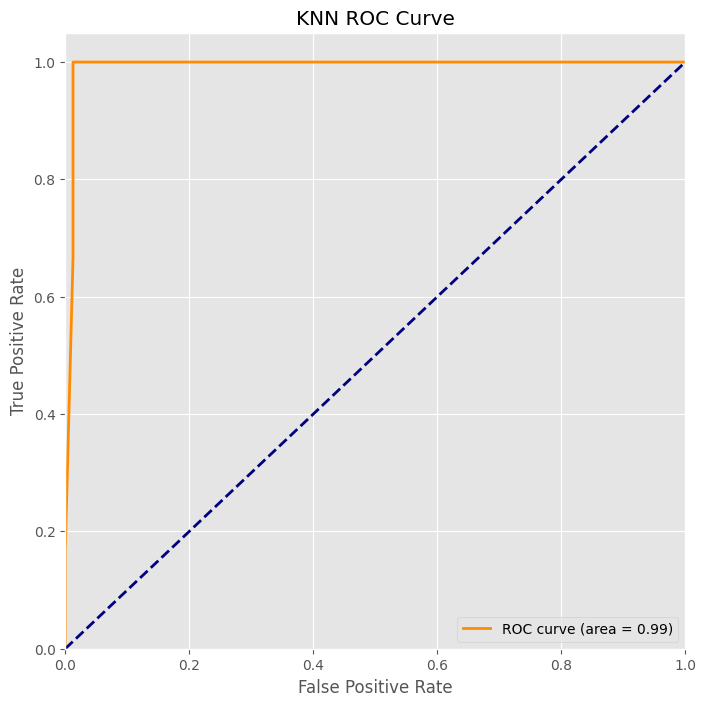

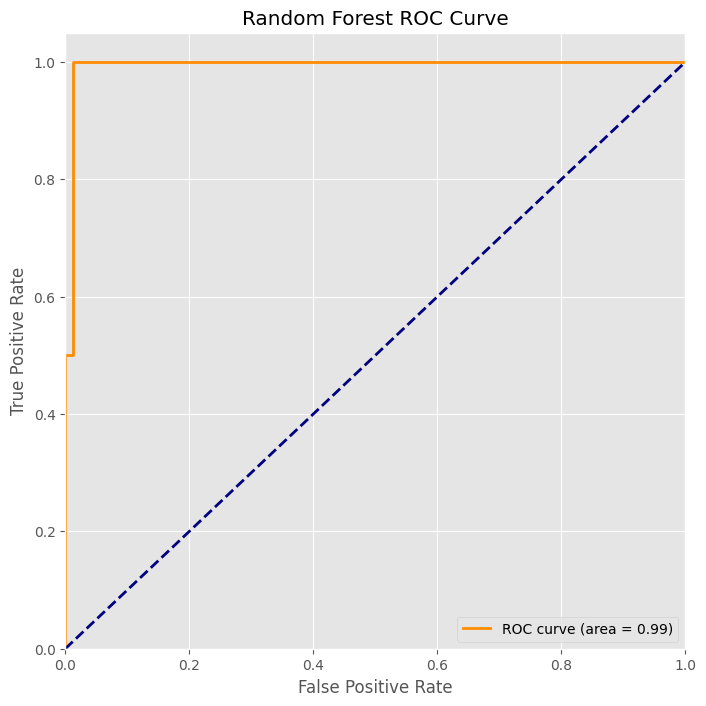

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


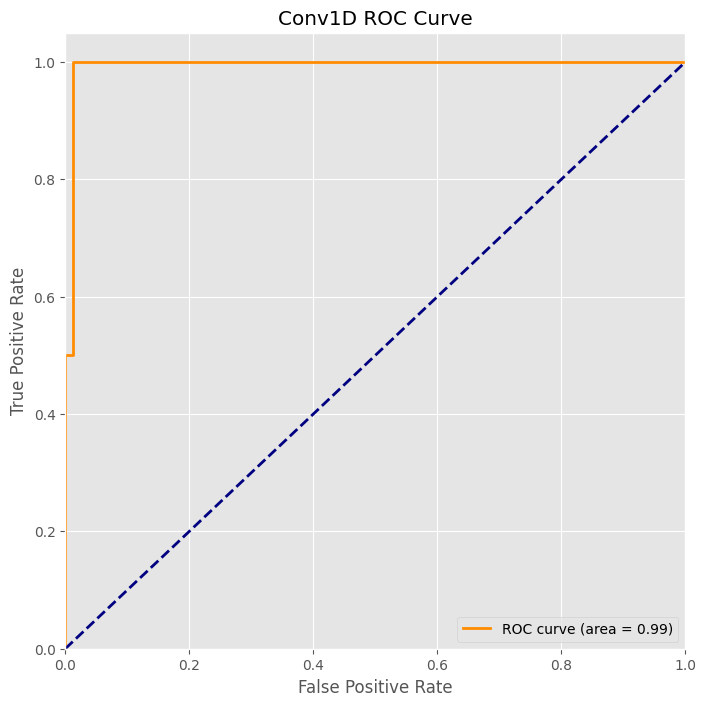

In [159]:
#KNN

# Function to plot ROC curves for a given model
def plot_roc_curve(model, X_test, y_test, model_name, is_conv1d=False):
    """
    Plot the ROC curve for a given model.

    Args:
    - model: The trained model.
    - X_test: Test features.
    - y_test: Test labels.
    - model_name: Name of the model (e.g., 'KNN', 'RF', 'Conv1D').
    - is_conv1d: Boolean indicating if the model is Conv1D-based.
    """
    if is_conv1d:
        # Reshape test data for Conv1D
        X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
        y_score = model.predict(X_test).ravel()  # Flatten probabilities
    else:
        # Get predicted probabilities
        y_score = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate KNN
knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_model.fit(features_train_all_std, labels_train_all)
plot_roc_curve(knn_model, features_test_all_std, labels_test_all, model_name="KNN")

# Evaluate Random Forest
rf_model = RandomForestClassifier(**best_rf_params, random_state=21)
rf_model.fit(features_train_all_std, labels_train_all)
plot_roc_curve(rf_model, features_test_all_std, labels_test_all, model_name="Random Forest")

# Evaluate Conv1D
conv1d_model = Sequential([
    Input(shape=(features_train_all_std.shape[1], 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])
conv1d_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Reshape training data for Conv1D
features_train_reshaped = features_train_all_std.values.reshape(features_train_all_std.shape[0], features_train_all_std.shape[1], 1)
conv1d_model.fit(features_train_reshaped, labels_train_all, epochs=5, batch_size=32, verbose=0)
plot_roc_curve(conv1d_model, features_test_all_std, labels_test_all, model_name="Conv1D", is_conv1d=True)